Zadaniem sieci jest przypisanie etykiety do odpowiedniego obrazka z liczbą. 

Dokumentacja gotowego badania: *https://keras.io/api/datasets/mnist/*

images=x, labels=y

####***1.Import bibliotek***

In [13]:
import keras
from keras.datasets import mnist #gotowy zbiór danych z tego badania
import matplotlib.pyplot as plt #wizualizacje
from keras import models, layers #sieci neuronowe
from keras.utils import to_categorical #kategoryzacja
import numpy as np #działania na wektorach

####***2.Przygotowanie danych***

In [14]:
#Podział zbioru danych na zbiór uczący i testowy (według gotowego podziału z dokumentacji)

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

[5 0 4 ... 5 6 8]
(60000, 28, 28)
(10000, 28, 28)
5


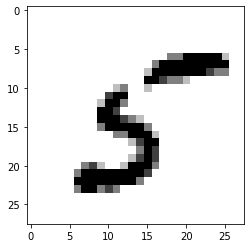

In [15]:
#Przegląd danych 

print(train_labels) #labels - jakie etykiety są przypisane kolejno w zbiorze
print(train_images.shape) #images - ile jest obrazków w zbiorze, rozmiar obrazków w pikselach
print(test_images.shape)
plt.imshow(train_images[47],cmap=plt.cm.binary) #funkcja do drukowania obrazków
print(train_labels[47])

####***3.Budowa i uczenie sieci***

In [16]:
#Budowa sieci

network = models.Sequential()

In [17]:
#warstwa wejściowa (256 neuronów, funkcja aktywacji: relu, rozmiar 28*28 bo tyle pikseli ma jedno zdjęcie)

network.add(layers.Dense(256,activation='relu',input_shape=(28*28,)))
#można zmieniać liczbę warstw, funkcj, żeby zoptymalizować wynik

In [18]:
#warstwa wyjściowa 10 neuronów bo mamyt 10 cyfr które możemy przypasować do zdjęć

network.add(layers.Dense(10,activation='sigmoid',input_shape=(28*28,)))

In [19]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [20]:
#kompilowanie sieci (podajemy jaką metodą będzie uczona)

network.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(train_labels[0])

5


In [21]:
#kategoryzacja danych

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
#normalizacja danych wejściowych (żeby szybciej działała sieć)

print(train_images[0]) #wyświetla piksele obrazka, chcemy przeskalować na przedział 0-1
train_images=train_images.reshape((60000,28*28)) #niby mamy podany rozmiar ale przekształcamy na 28*28 na wszelki wypadek
test_images=test_images.reshape((10000,28*28))
train_images=train_images.astype('float32')/255 #dzielimy przez 255 bo wiemy że 255 to maks a chcemy liczby z przedziału 0-1
test_images=test_images.astype('float32')/255
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [23]:
#uczenie sieci

network.fit(train_images,train_labels,epochs=5, batch_size=128) 
#epochs - liczba przejść przez zbiór uczący, które model ma wykonać podczas uczenia 
#batch_size - rozmiar partii danych, który jest używany podczas jednej iteracji przez proces uczenia

Epoch 1/5
469/469 [==============================] - 6s 4ms/step - loss: 0.3118 - accuracy: 0.9151
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1310 - accuracy: 0.9622
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9810
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9853


####***4.Ocena jakości klasyfikacji***

In [24]:
#sprawdzenie wyników na zbiorze testowym (czy nie przeuczyliśmy sieci)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss) # to samo bez zaokrągleń
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9766
0.07489370554685593
0.9765999913215637


7


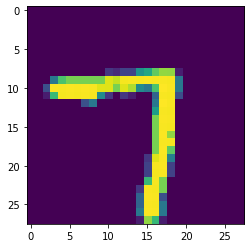

In [26]:
#sprawdzamy na losowym zdjęciu

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data() #dzielimy zbiór jeszcze raz bo znormalizowaliśmy piksele i wyświetlenie obrazka nie jest możliwe
img=test_images[410]
plt.imshow(img)
print(test_labels[410])

In [27]:
network.save('rozpoznawanie.cyfr.model')
new_model=keras.models.load_model('rozpoznawanie.cyfr.model')

In [29]:
#normalizujemy nasze losowo wybrane zdjęcie

img=img.reshape((28*28))
img=img.astype('float32')/255

In [33]:
#sprawdzamy wynik dla tego obrazka

result=new_model.predict(np.array([img]))
print(result)
print(np.argmax(result)) #etykieta = numer pozycji dla której wartość jest największa

1/1 [==============================] - 0s 26ms/step
[[5.4183435e-03 4.1365344e-03 6.5180147e-01 8.8659984e-01 2.0627314e-04
  1.6212255e-02 8.6065489e-07 9.9999702e-01 4.5567169e-03 9.6565408e-01]]
7
